In [1]:
%autosave 0

Autosave disabled


# EXPLORATION PHASE

In [2]:
# imported libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# custom module
import wrangle as w

In [3]:
train, val, test = w.wrangle_wine()

In [4]:
train.T

,3761,3740,1359,1230,4751,5128,4379,4698,733,2187,...,5334,466,6265,5734,3092,3772,5191,5226,5390,860
fixed_acidity,9.9,7.7,11.6,7.7,7.6,7.1,6.2,6.7,7.0,6.9,...,6.1,10.3,6.4,5.9,8.0,7.6,5.6,6.4,6.5,7.2
volatile_acidity,0.49,0.28,0.475,0.18,0.25,0.35,0.235,0.34,0.45,0.28,...,0.22,0.5,0.31,0.26,0.34,0.32,0.28,0.37,0.26,0.62
citric_acid,0.23,0.35,0.4,0.34,1.23,0.27,0.34,0.4,0.34,0.27,...,0.46,0.42,0.53,0.24,0.49,0.58,0.27,0.2,0.5,0.06
residual_sugar,2.4,15.3,1.4,2.7,4.6,3.1,1.9,2.1,2.7,2.1,...,1.8,2.0,8.8,2.4,9.0,16.75,3.9,5.6,8.0,2.7
chlorides,0.087,0.056,0.091,0.066,0.035,0.034,0.036,0.033,0.082,0.036,...,0.16,0.069,0.057,0.046,0.033,0.05,0.043,0.117,0.051,0.077
free_sulfur_dioxide,19.0,31.0,6.0,15.0,51.0,28.0,4.0,34.0,16.0,42.0,...,34.0,21.0,36.0,27.0,39.0,43.0,52.0,61.0,46.0,15.0
total_sulfur_dioxide,115.0,117.0,28.0,58.0,294.0,134.0,117.0,111.0,72.0,121.0,...,74.0,51.0,221.0,132.0,180.0,163.0,158.0,183.0,197.0,85.0
density,0.9948,0.9998,0.99704,0.9947,0.99018,0.9897,0.99032,0.98924,0.998,0.9926,...,0.9884,0.9982,0.99642,0.99234,0.9936,0.9999,0.99202,0.99459,0.99536,0.99746
ph,2.77,3.27,3.07,3.37,3.03,3.26,3.4,2.97,3.55,3.42,...,3.19,3.16,3.17,3.63,3.13,3.15,3.35,3.24,3.18,3.51
sulphates,0.44,0.5,0.65,0.78,0.43,0.38,0.44,0.48,0.6,0.49,...,0.33,0.72,0.44,0.73,0.38,0.54,0.44,0.43,0.47,0.54


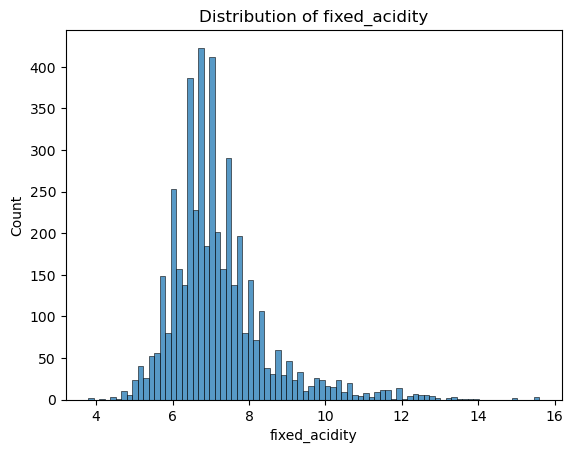

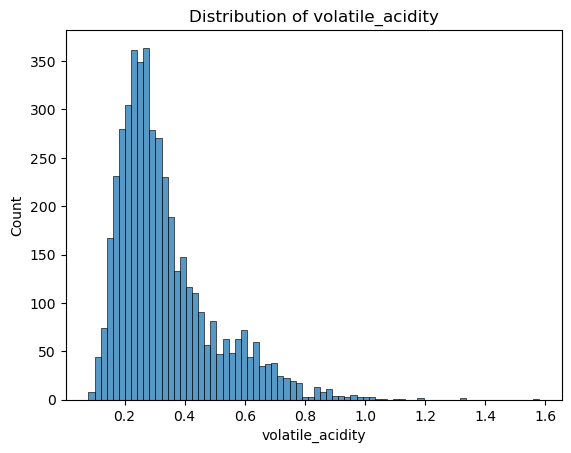

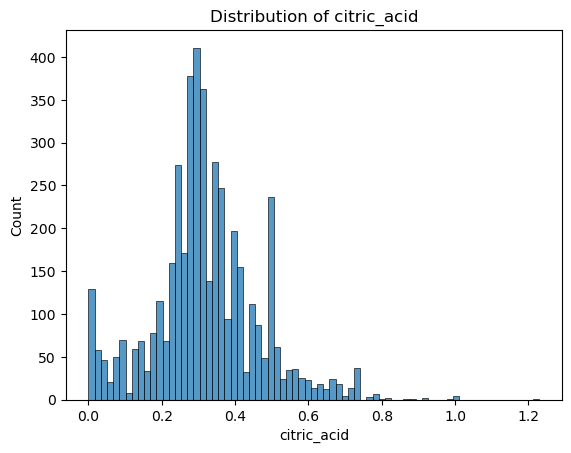

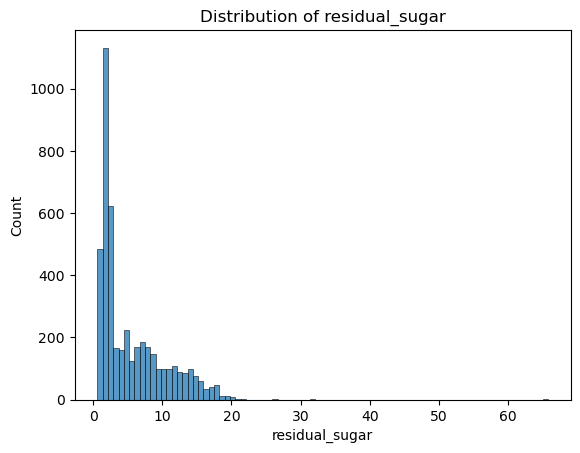

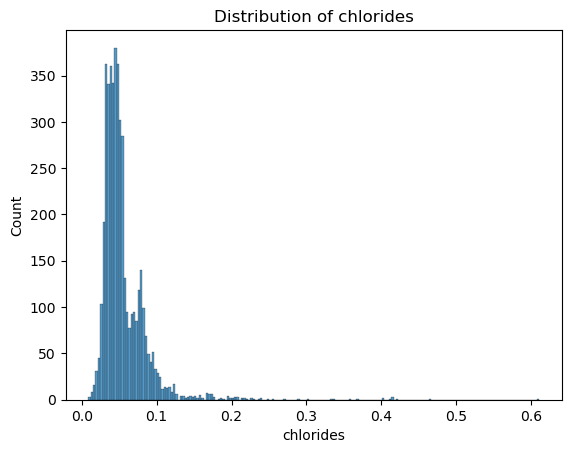

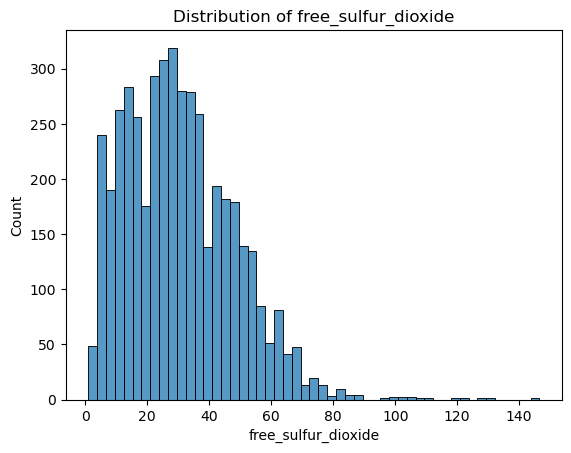

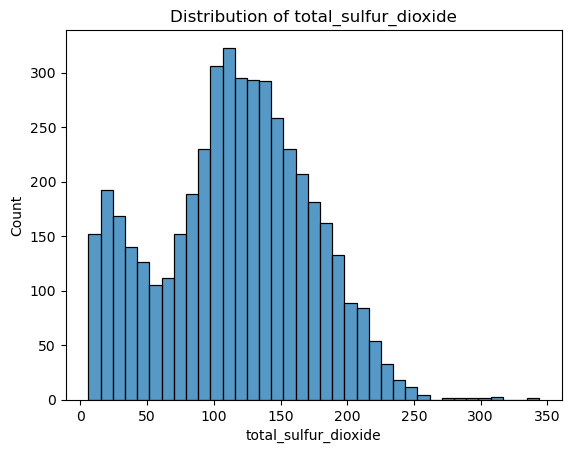

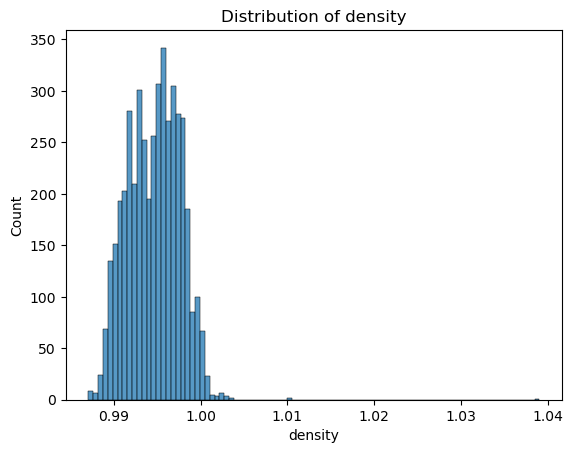

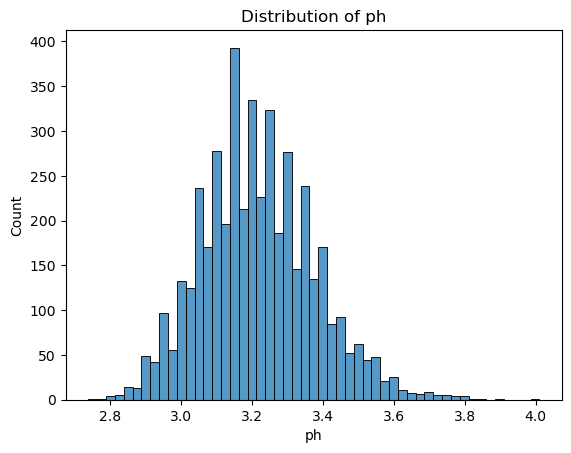

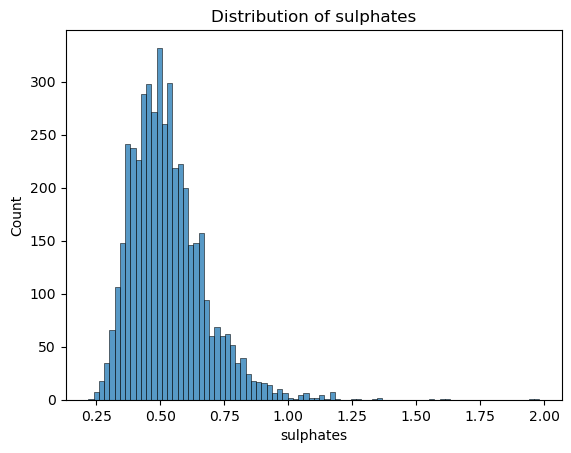

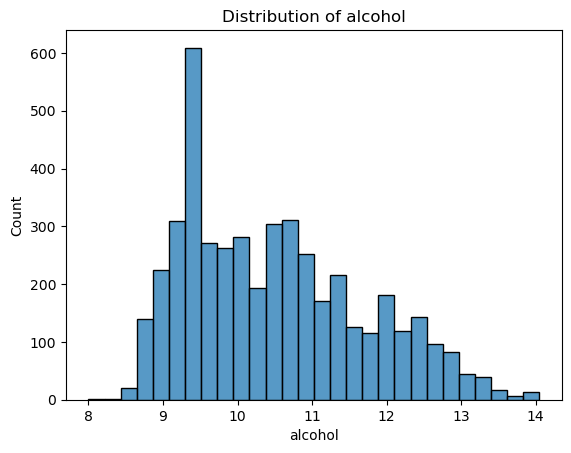

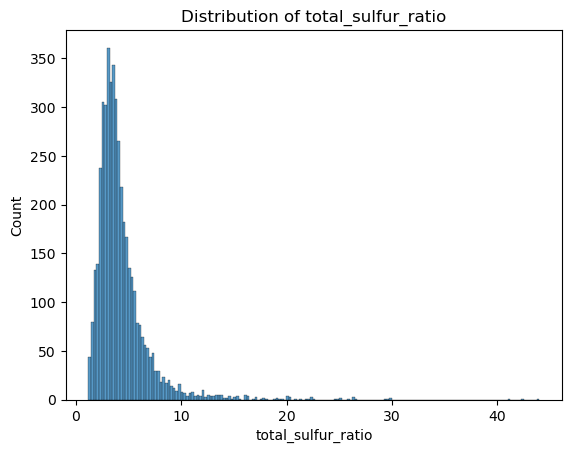

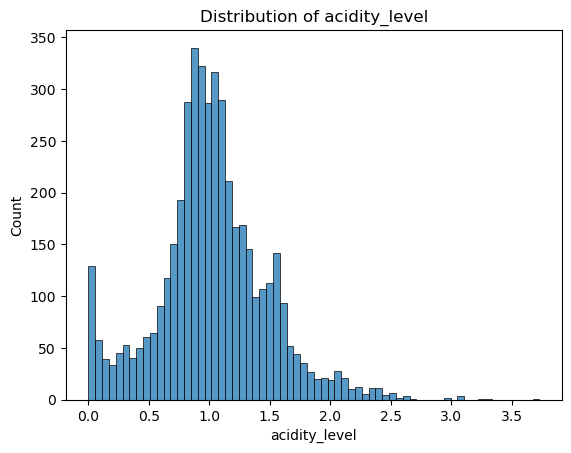

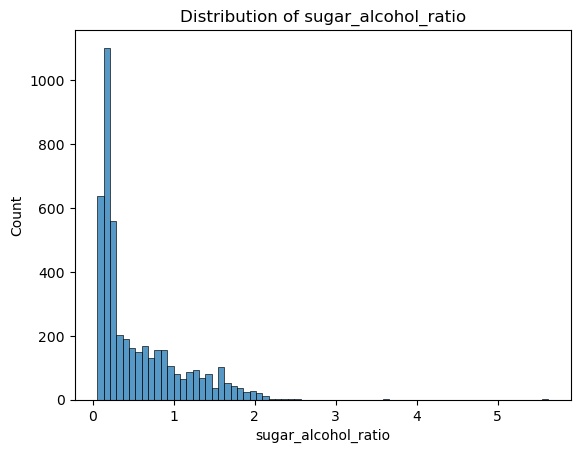

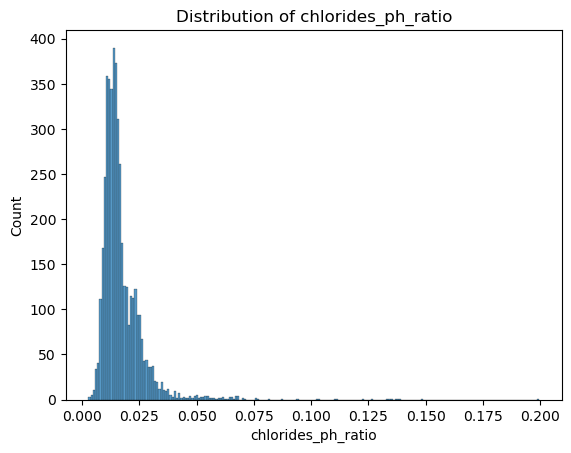

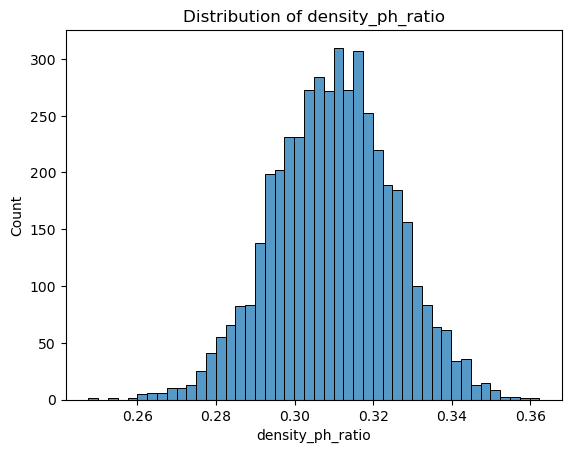

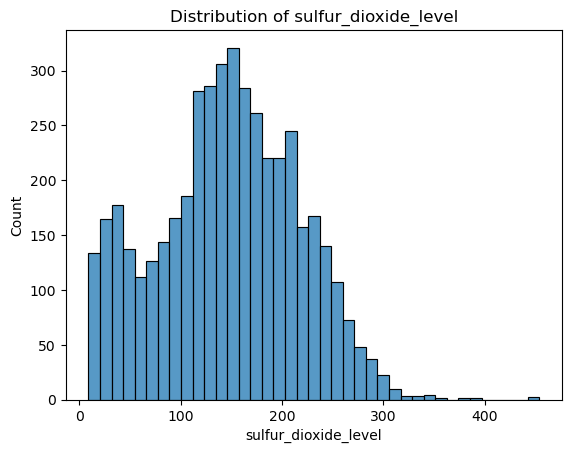

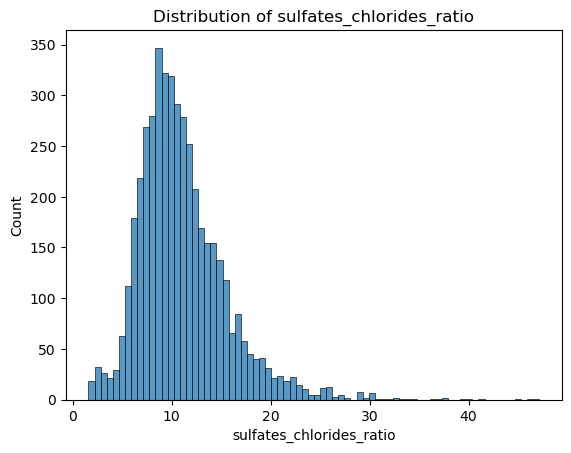

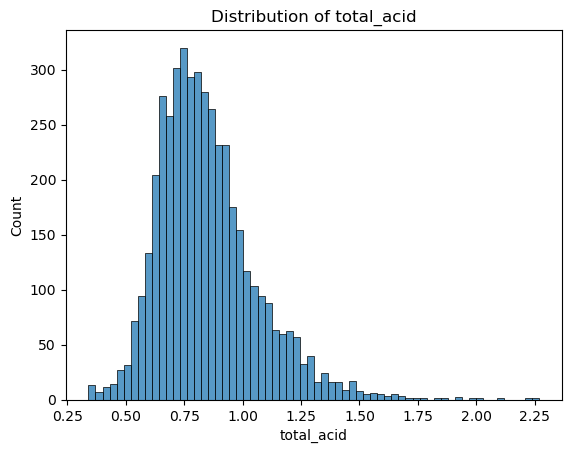

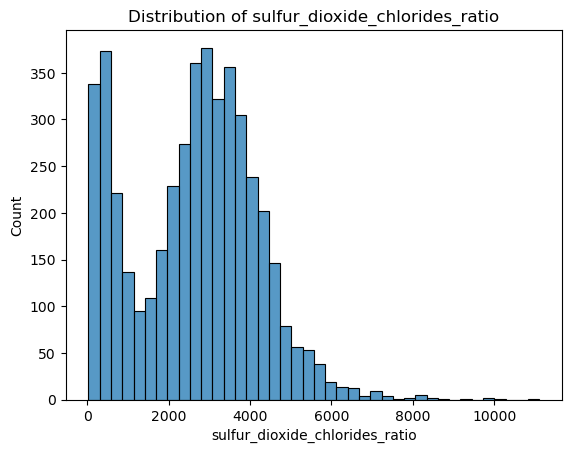

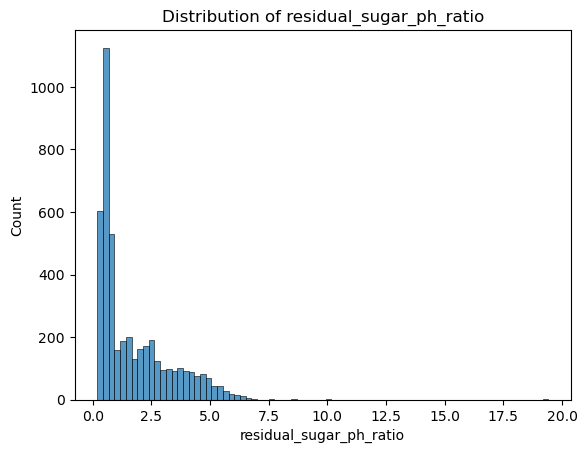

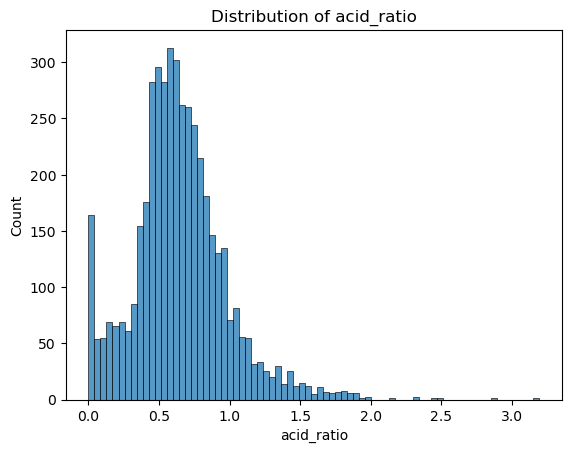

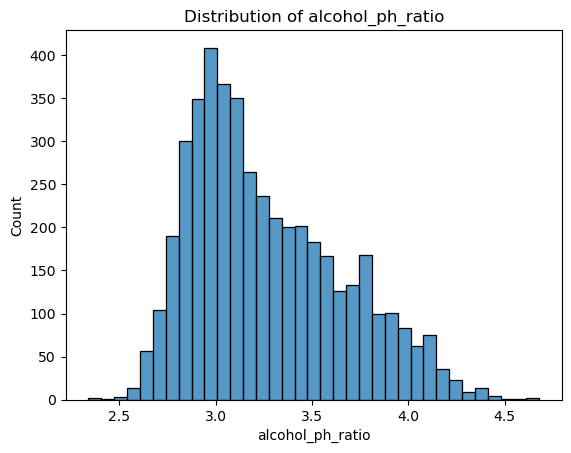

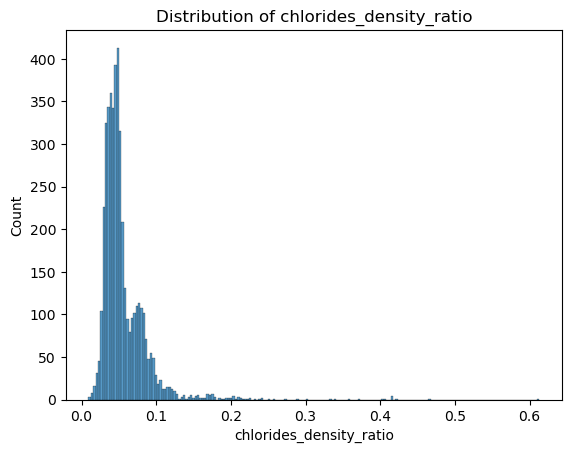

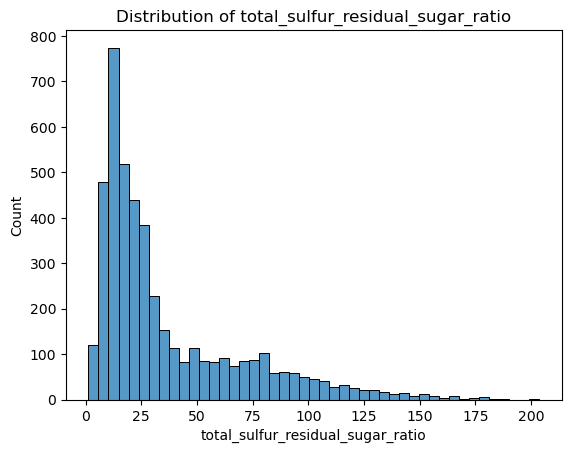

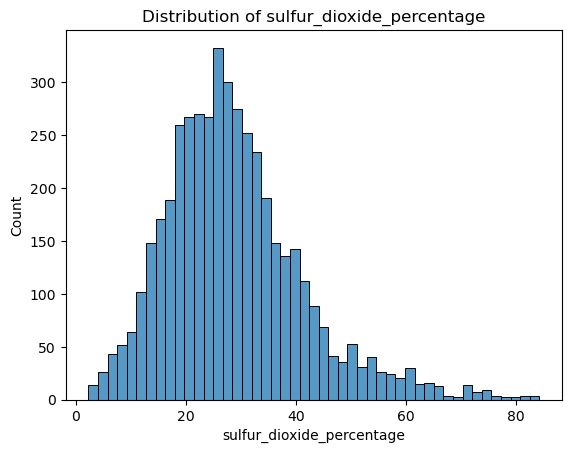

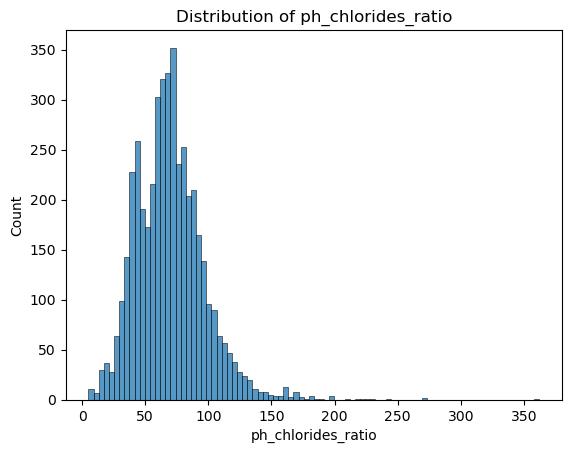

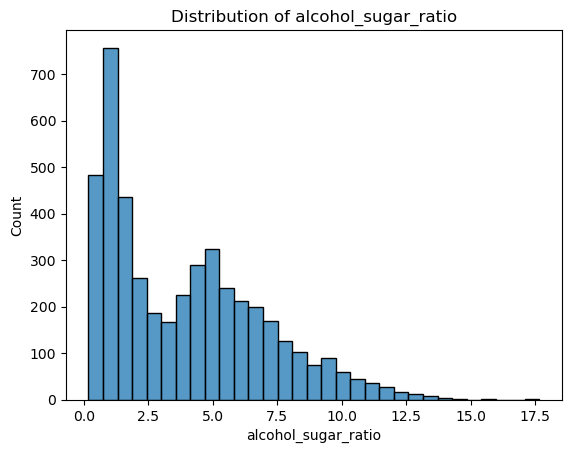

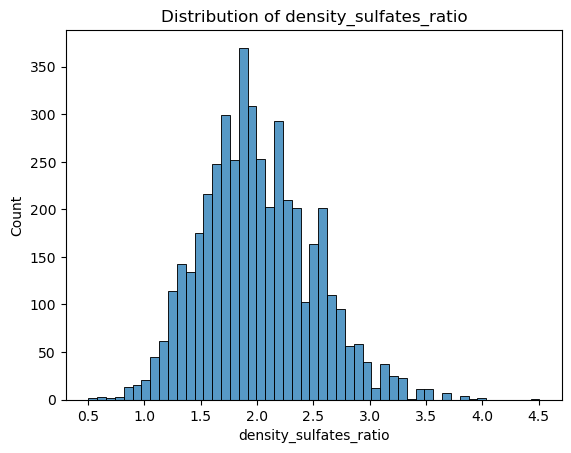

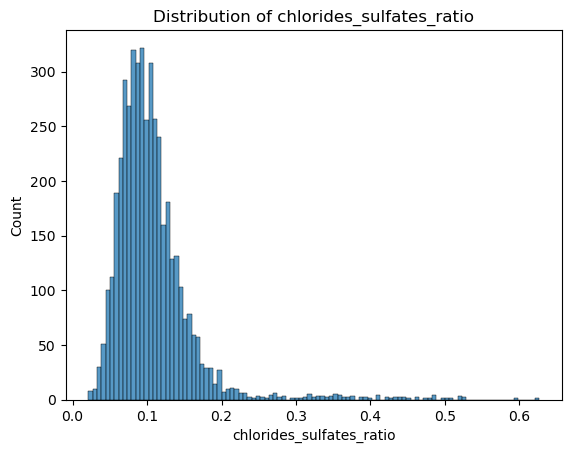

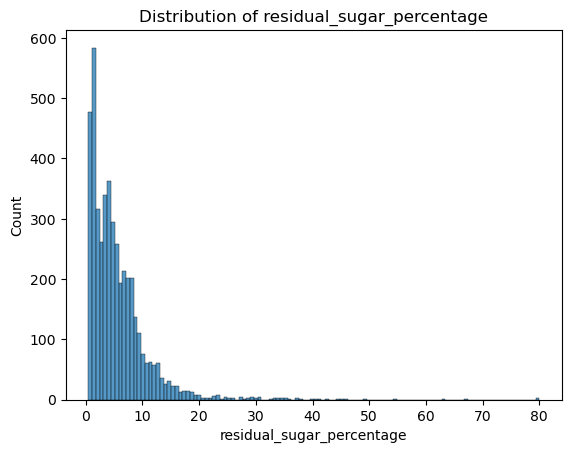

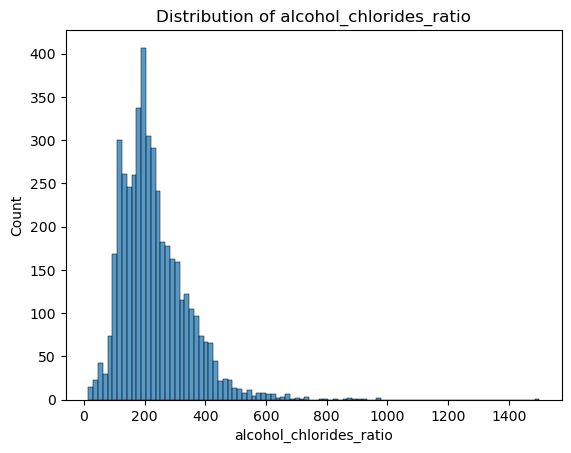

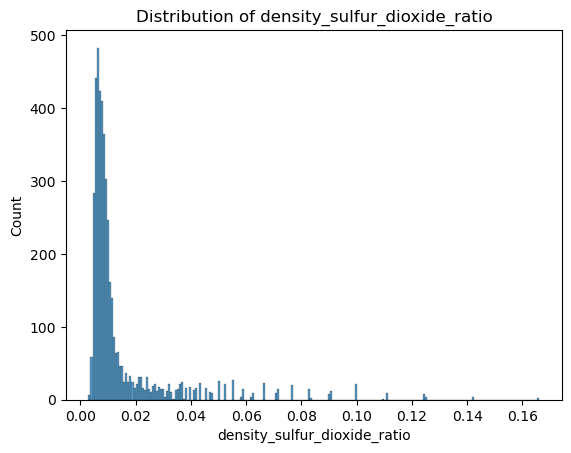

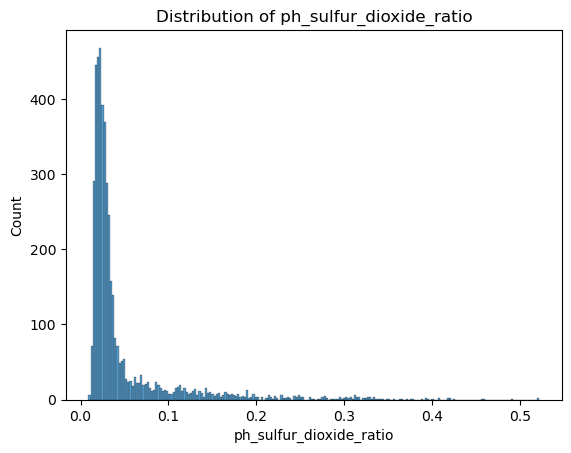

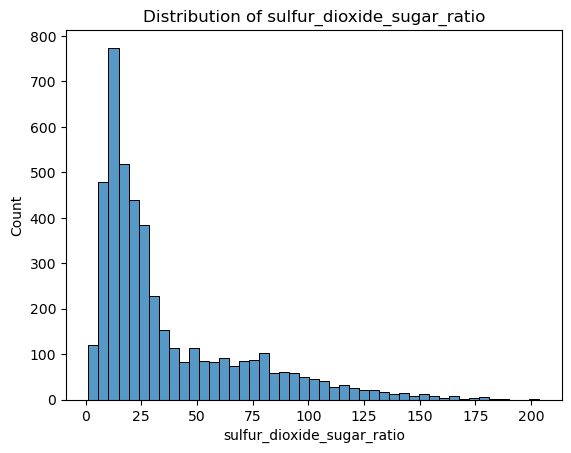

In [5]:
# data distribution
for col in train.columns[train.dtypes == 'float64']:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=train, x=col)
    plt.show()

In [6]:
train.columns.to_list()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality',
 'quality_bins',
 'alcohol_bins',
 'total_sulfur_ratio',
 'acidity_level',
 'sugar_alcohol_ratio',
 'chlorides_ph_ratio',
 'density_ph_ratio',
 'sulfur_dioxide_level',
 'sulfates_chlorides_ratio',
 'ph_bins',
 'total_acid',
 'sulfur_dioxide_chlorides_ratio',
 'residual_sugar_ph_ratio',
 'acid_ratio',
 'alcohol_ph_ratio',
 'chlorides_density_ratio',
 'total_sulfur_residual_sugar_ratio',
 'sulfur_dioxide_percentage',
 'ph_chlorides_ratio',
 'alcohol_sugar_ratio',
 'density_sulfates_ratio',
 'chlorides_sulfates_ratio',
 'residual_sugar_percentage',
 'alcohol_chlorides_ratio',
 'density_sulfur_dioxide_ratio',
 'ph_sulfur_dioxide_ratio',
 'sulfur_dioxide_sugar_ratio']

In [7]:
numericals = ['fixed_acidity',
             'volatile_acidity',
             'citric_acid',
             'residual_sugar',
             'chlorides',
             'free_sulfur_dioxide',
             'total_sulfur_dioxide',
             'density',
             'ph',
             'sulphates',
             'alcohol',
             'quality',
             'quality_bins',
             'alcohol_bins',
             'total_sulfur_ratio',
             'acidity_level',
             'sugar_alcohol_ratio',
             'chlorides_ph_ratio',
             'density_ph_ratio',
             'sulfur_dioxide_level',
             'sulfates_chlorides_ratio',
             'ph_bins',
             'total_acid',
             'sulfur_dioxide_chlorides_ratio',
             'residual_sugar_ph_ratio',
             'acid_ratio',
             'alcohol_ph_ratio',
             'chlorides_density_ratio',
             'total_sulfur_residual_sugar_ratio',
             'sulfur_dioxide_percentage',
             'ph_chlorides_ratio',
             'alcohol_sugar_ratio',
             'density_sulfates_ratio',
             'chlorides_sulfates_ratio',
             'residual_sugar_percentage',
             'alcohol_chlorides_ratio',
             'density_sulfur_dioxide_ratio',
             'ph_sulfur_dioxide_ratio',
             'sulfur_dioxide_sugar_ratio'
             ]

In [8]:
# sns.pairplot(data=df[numericals], hue='quality', corner=True)

In [9]:
train.columns.to_list()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality',
 'quality_bins',
 'alcohol_bins',
 'total_sulfur_ratio',
 'acidity_level',
 'sugar_alcohol_ratio',
 'chlorides_ph_ratio',
 'density_ph_ratio',
 'sulfur_dioxide_level',
 'sulfates_chlorides_ratio',
 'ph_bins',
 'total_acid',
 'sulfur_dioxide_chlorides_ratio',
 'residual_sugar_ph_ratio',
 'acid_ratio',
 'alcohol_ph_ratio',
 'chlorides_density_ratio',
 'total_sulfur_residual_sugar_ratio',
 'sulfur_dioxide_percentage',
 'ph_chlorides_ratio',
 'alcohol_sugar_ratio',
 'density_sulfates_ratio',
 'chlorides_sulfates_ratio',
 'residual_sugar_percentage',
 'alcohol_chlorides_ratio',
 'density_sulfur_dioxide_ratio',
 'ph_sulfur_dioxide_ratio',
 'sulfur_dioxide_sugar_ratio']

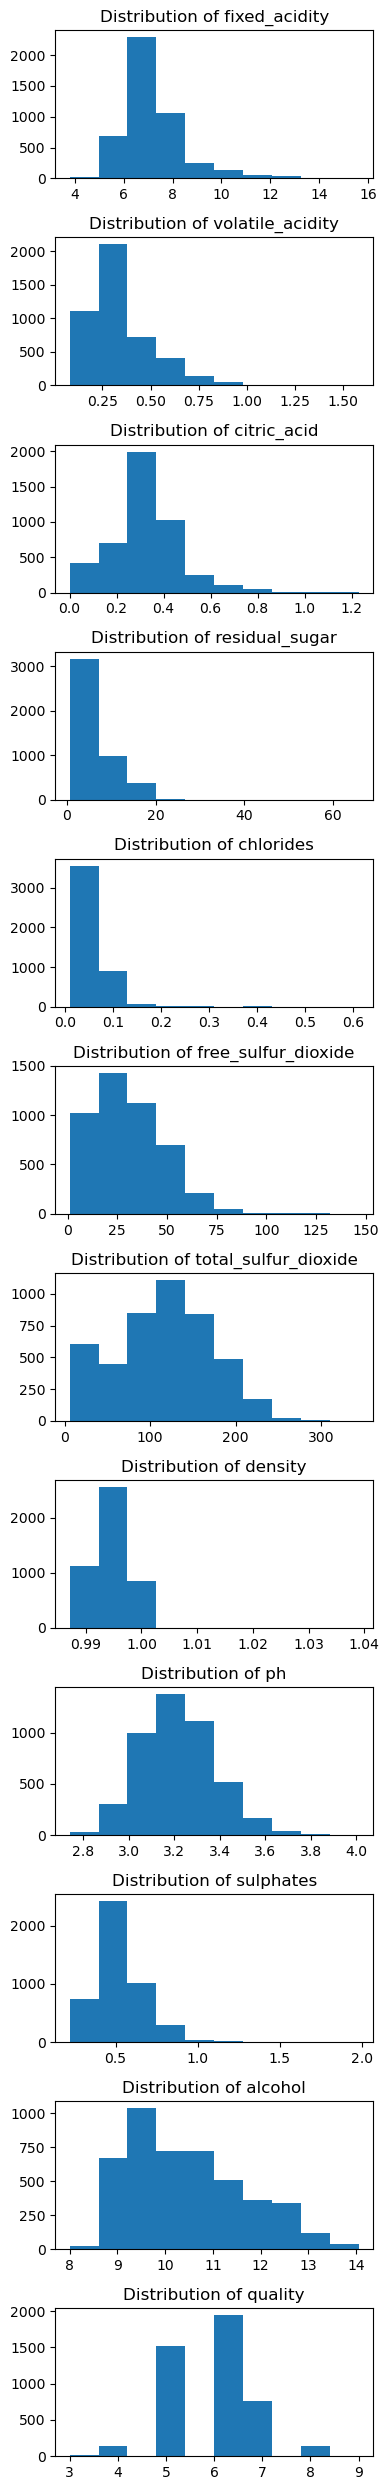

In [10]:
fig, axs = plt.subplots(12,1, figsize=(4,25))
for col, ax in zip(numericals, axs):
    ax.hist(train[col])
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## scaled features cannot be explored thoroughly, so i am importing only the clean version to explore.

In [11]:
df = w.clean_wine()

In [12]:
df.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,sulfur_dioxide_percentage,ph_chlorides_ratio,alcohol_sugar_ratio,density_sulfates_ratio,chlorides_sulfates_ratio,residual_sugar_percentage,alcohol_chlorides_ratio,density_sulfur_dioxide_ratio,ph_sulfur_dioxide_ratio,sulfur_dioxide_sugar_ratio
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,32.352941,46.184211,4.947368,1.781786,0.135714,5.588235,123.684211,0.029347,0.103235,17.894737
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,37.313433,32.653061,3.769231,1.465882,0.144118,3.880597,100.000000,0.014878,0.047761,25.769231


In [13]:
df.dtypes

fixed_acidity                         float64
volatile_acidity                      float64
citric_acid                           float64
residual_sugar                        float64
chlorides                             float64
free_sulfur_dioxide                   float64
total_sulfur_dioxide                  float64
density                               float64
ph                                    float64
sulphates                             float64
alcohol                               float64
quality                                 int64
quality_bins                         category
alcohol_bins                         category
total_sulfur_ratio                    float64
acidity_level                         float64
sugar_alcohol_ratio                   float64
chlorides_ph_ratio                    float64
density_ph_ratio                      float64
sulfur_dioxide_level                  float64
sulfates_chlorides_ratio              float64
ph_bins                           

In [14]:
numericals = ['fixed_acidity',
               'volatile_acidity',
               'citric_acid',
               'residual_sugar',
               'chlorides',
               'free_sulfur_dioxide',
               'total_sulfur_dioxide',
               'density',
               'ph',
               'sulphates',
               'alcohol',
               'quality',
               'total_sulfur_ratio',
               'acidity_level',
               'sugar_alcohol_ratio',
               'chlorides_ph_ratio',
               'density_ph_ratio',
               'sulfur_dioxide_level',
               'sulfates_chlorides_ratio',
               'total_acid',
               'sulfur_dioxide_chlorides_ratio',
               'residual_sugar_ph_ratio',
               'acid_ratio',
               'alcohol_ph_ratio',
               'chlorides_density_ratio',
               'total_sulfur_residual_sugar_ratio',
               'ph_chlorides_ratio',
               'alcohol_sugar_ratio',
               'density_sulfates_ratio',
               'chlorides_sulfates_ratio',
               'residual_sugar_percentage',
               'alcohol_chlorides_ratio',
               'density_sulfur_dioxide_ratio',
               'ph_sulfur_dioxide_ratio',
               'sulfur_dioxide_sugar_ratio'
              ]
categoricals = ['quality_bins', 'alcohol_bins', 'ph_bins']
explore_cols = numericals + categoricals

In [15]:
#sns.pairplot(data=df[numericals], hue='quality', corner=True)

In [16]:
for col in df.columns[df.dtypes == 'category']:
    print(df[col].value_counts())
    print()
    print('--------------------')
    print()

Medium    5190
High      1277
Low         30
Name: quality_bins, dtype: int64

--------------------

Low       2832
Medium    2813
High       852
Name: alcohol_bins, dtype: int64

--------------------

Medium    5642
Low        546
High       309
Name: ph_bins, dtype: int64

--------------------



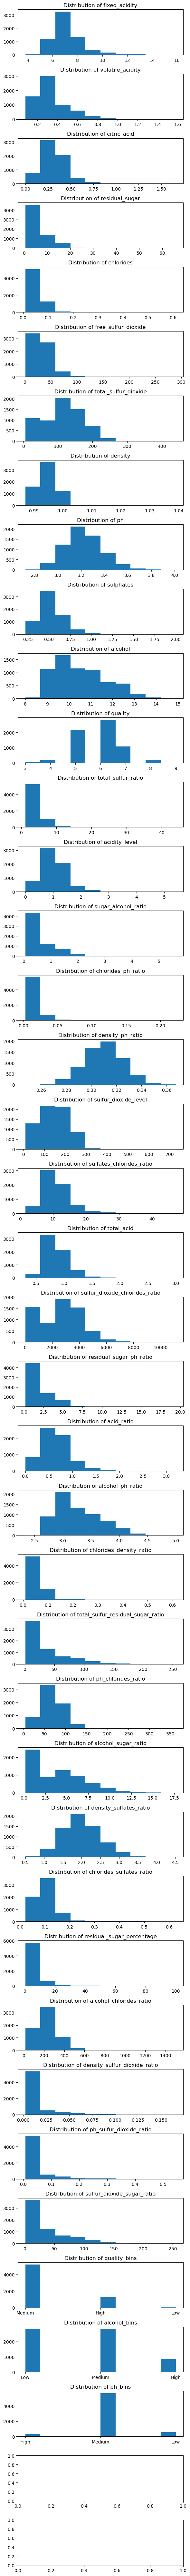

In [17]:
fig, axs = plt.subplots(40,1, figsize=(6,80))
for col, ax in zip(explore_cols, axs):
    ax.hist(df[col])
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [18]:
df['alcohol_bins'] = pd.cut(df['alcohol'],[0, 8, 10, 12, 15], labels=['no_alcohol', 'Low_alcohol','medium_alcohol', 'High_alcohol'])
df['quality_bins'] = pd.cut(df['quality'], [0, 3, 7, 10], labels=['low', 'medium', 'high'])

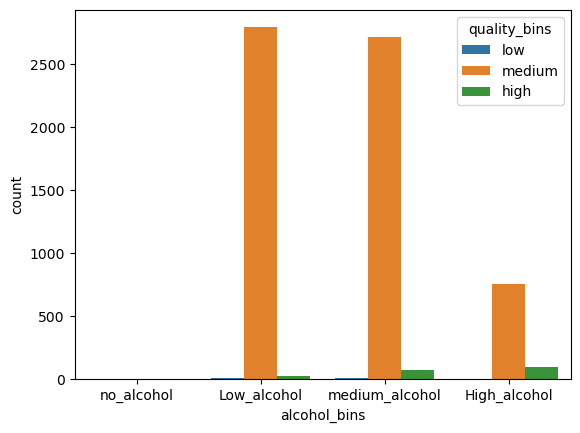

In [19]:
sns.countplot(data=df, x='alcohol_bins', hue='quality_bins')
plt.show()

In [20]:
def eval_p(p, a=0.05, decimal_places=2):
    """
    Evaluate the p-value and print the result of hypothesis testing.

    Args:
        p (float): The p-value to evaluate.
        a (float, optional): The significance level (default is 0.05).
        decimal_places (int, optional): The number of decimal places for formatting p-value (default is 2).

    Returns:
        None
    """
    formatted_p = "{:.{precision}e}".format(p, precision=decimal_places)
    if p < a:
        print(f'\nWe reject the null hypothesis with a p-value of {formatted_p}.')
    else:
        print(f'\nWe failed to reject the null hypothesis with a p-value of {formatted_p}.')



def chi2_and_visualize(df, cat_var, target, a=0.05, decimal_places=2):
    """
    Perform chi-squared test and visualize the results.

    Args:
        df (DataFrame): The DataFrame containing the data.
        cat_var (str): The categorical variable to be tested.
        target (str): The target variable for the chi-squared test.
        a (float, optional): The significance level (default is 0.05).
        decimal_places (int, optional): The number of decimal places for formatting p-value (default is 2).

    Returns:
        None
    """
    observed = pd.crosstab(df[cat_var], df[target])
    chi2, p, degf, e = stats.chi2_contingency(observed)

    print('\n\n----------------------------------------------------------------------------------------------------\n')
    
    print(f'Chi2 Statistic: {chi2:.2f}\n')
    formatted_p = "{:.{precision}e}".format(p, precision=decimal_places)
    print(f'P-Value: {formatted_p}\n')
    # print(f'Degrees of Freedom: {degf}\n')
    # print(f'Expected: {e}\n')

    # Plotting the countplot
    sns.countplot(data=df, x=cat_var, hue=target)
    plt.title(f'Wine Quality vs. Alcohol Content Range')
    plt.xlabel(f'Alcohol Content')
    plt.ylabel(f'Wine Quality')
    plt.legend(title='Wine Quality', labels=['Low', 'Medium', 'High'])
    plt.show()

    eval_p(p)

    print('\n')

def analysis_1(df, cat_var, target, a=0.05):
    """
    Perform chi-squared test and visualize the results for quality vs. alcohol.

    Args:
        df (DataFrame): The DataFrame containing the data.
        cat_var (str): The categorical variable (alcohol bins) to be tested.
        target (str): The target variable (wine quality) for the chi-squared test.
        a (float, optional): The significance level (default is 0.05).

    Returns:
        None
    """
    chi2_and_visualize(df, cat_var, target, a=0.05)

## created categorical features for chi_2 test

In [21]:
df.columns.to_list()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality',
 'quality_bins',
 'alcohol_bins',
 'total_sulfur_ratio',
 'acidity_level',
 'sugar_alcohol_ratio',
 'chlorides_ph_ratio',
 'density_ph_ratio',
 'sulfur_dioxide_level',
 'sulfates_chlorides_ratio',
 'ph_bins',
 'total_acid',
 'sulfur_dioxide_chlorides_ratio',
 'residual_sugar_ph_ratio',
 'acid_ratio',
 'alcohol_ph_ratio',
 'chlorides_density_ratio',
 'total_sulfur_residual_sugar_ratio',
 'sulfur_dioxide_percentage',
 'ph_chlorides_ratio',
 'alcohol_sugar_ratio',
 'density_sulfates_ratio',
 'chlorides_sulfates_ratio',
 'residual_sugar_percentage',
 'alcohol_chlorides_ratio',
 'density_sulfur_dioxide_ratio',
 'ph_sulfur_dioxide_ratio',
 'sulfur_dioxide_sugar_ratio']

## Q1. Is alcohol dependent on quality of wine
**(H$0$:) The quality of wine is NOT dependent on the alcohol content.**  
**(H$a$:) The quality of wine is dependent on the alcohol content.**

## Takeaway: 
**We can determine that the quality of wine does is not dependent on the alcohol content of the wine. We can also clearly ee that most of the wine in the dataset is comprised of medium quality wine which ranges from a rank of 4 to 6.**



----------------------------------------------------------------------------------------------------

Chi2 Statistic: 349.43

P-Value: 2.04e-72



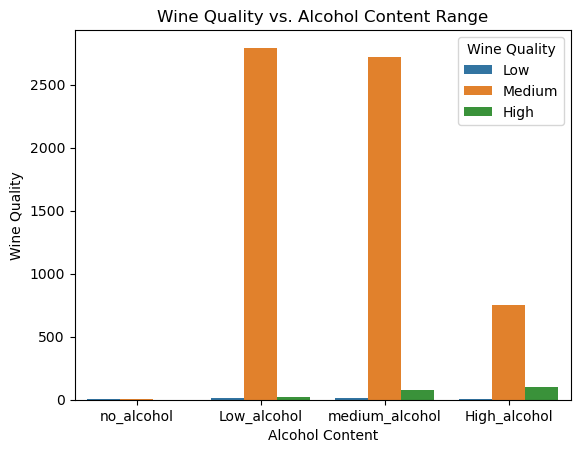


We reject the null hypothesis with a p-value of 2.04e-72.




In [22]:
analysis_1(df, 'alcohol_bins', 'quality_bins')

## Q2. **Is there a statistically significant difference in the mean alcohol percentage between wines of low quality and high quality?** 

> **(H$0$:) The mean alcohol percentage of low-quality wines is equal to the mean alcohol percentage of high-quality wines.**
> 
> **(H$a$:) The mean alcohol percentage of low-quality wines is not equal to the mean alcohol percentage of high-quality wines.**

In [23]:
def eval_p(p, a=0.05, decimal_places=2):
    """
    Evaluate the p-value and print the result of hypothesis testing.

    Args:
        p (float): The p-value to evaluate.
        a (float, optional): The significance level (default is 0.05).
        decimal_places (int, optional): The number of decimal places for formatting p-value (default is 2).

    Returns:
        None
    """
    formatted_p = "{:.{precision}e}".format(p, precision=decimal_places)
    if p < a:
        print(f'\nWe reject the null hypothesis with a p-value of {formatted_p}.')
    else:
        print(f'\nWe failed to reject the null hypothesis with a p-value of {formatted_p}.')

def one_sample_t_test(data, pop_mean, a=0.05):
    t, p = stats.ttest_1samp(data, pop_mean)
    result = eval_p(p)
    
    print(f'T-Statistic: {t}\n')
    print(result)

    # Plot a histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data)
    
    # Add a vertical line for the population mean
    plt.axvline(x=pop_mean, color='red', linestyle='--', label=f'Population Mean ({pop_mean:.1f})')
    
    plt.title(f'1-Sample t-test Analysis\nData: {data.name}\n')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()  # Add a legend to label the vertical line
    plt.show()

def analysis_2(df, num_col_name, a=0.05):
    num_col = df[num_col_name]
    pop_mean = df[num_col_name].mean()
    one_sample_t_test(num_col, pop_mean, a=0.05)


In [24]:
# visualize the results
# one_sample_t_test(data, pop_mean)

## Takeaway:

**The mean alcohol percentage of low-quality wines is equal to the mean alcohol percentage of high-quality wines. a larger frequency of wine is more grouped on te 9.5 to 11 range of values, so the mean value make sense for alcohol content.**


# nisha's function stats test

In [25]:
# def get_dummies(df, col_name):
#     # Create dummy variables for the specified column
#     dummies = pd.get_dummies(df[col_name], prefix=col_name)
    
#     # Drop the original column
#     df.drop(col_name, axis=1, inplace=True)
    
#     # Concatenate the dummies with the DataFrame
#     df = pd.concat([df, dummies], axis=1)
    
#     return df

# # Usage
# df = get_dummies(df, 'quality_bins')

In [26]:
# df.columns.to_list()

In [27]:
train, val, test= w.wrangle_wine()

In [28]:
train.head().T

,3761,3740,1359,1230,4751
fixed_acidity,9.9,7.7,11.6,7.7,7.6
volatile_acidity,0.49,0.28,0.475,0.18,0.25
citric_acid,0.23,0.35,0.4,0.34,1.23
residual_sugar,2.4,15.3,1.4,2.7,4.6
chlorides,0.087,0.056,0.091,0.066,0.035
free_sulfur_dioxide,19.0,31.0,6.0,15.0,51.0
total_sulfur_dioxide,115.0,117.0,28.0,58.0,294.0
density,0.9948,0.9998,0.99704,0.9947,0.99018
ph,2.77,3.27,3.07,3.37,3.03
sulphates,0.44,0.5,0.65,0.78,0.43


In [29]:
train.columns.to_list()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality',
 'quality_bins',
 'alcohol_bins',
 'total_sulfur_ratio',
 'acidity_level',
 'sugar_alcohol_ratio',
 'chlorides_ph_ratio',
 'density_ph_ratio',
 'sulfur_dioxide_level',
 'sulfates_chlorides_ratio',
 'ph_bins',
 'total_acid',
 'sulfur_dioxide_chlorides_ratio',
 'residual_sugar_ph_ratio',
 'acid_ratio',
 'alcohol_ph_ratio',
 'chlorides_density_ratio',
 'total_sulfur_residual_sugar_ratio',
 'sulfur_dioxide_percentage',
 'ph_chlorides_ratio',
 'alcohol_sugar_ratio',
 'density_sulfates_ratio',
 'chlorides_sulfates_ratio',
 'residual_sugar_percentage',
 'alcohol_chlorides_ratio',
 'density_sulfur_dioxide_ratio',
 'ph_sulfur_dioxide_ratio',
 'sulfur_dioxide_sugar_ratio']

In [1]:
import warnings
warnings.filterwarnings("ignore")

import wrangle as w
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [2]:
train, val, test= w.wrangle_wine()

In [3]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,sulfur_dioxide_percentage,ph_chlorides_ratio,alcohol_sugar_ratio,density_sulfates_ratio,chlorides_sulfates_ratio,residual_sugar_percentage,alcohol_chlorides_ratio,density_sulfur_dioxide_ratio,ph_sulfur_dioxide_ratio,sulfur_dioxide_sugar_ratio
3761,9.9,0.490,0.23,2.4,0.087,19.0,115.0,0.99480,2.77,0.44,...,16.521739,31.839080,3.916667,2.260909,0.197727,2.086957,108.045977,0.008650,0.024087,47.916667
3740,7.7,0.280,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,...,26.495726,58.392857,0.627451,1.999600,0.112000,13.076923,171.428571,0.008545,0.027949,7.647059
1359,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,...,21.428571,33.736264,7.166667,1.533908,0.140000,5.000000,110.256410,0.035609,0.109643,20.000000
1230,7.7,0.180,0.34,2.7,0.066,15.0,58.0,0.99470,3.37,0.78,...,25.862069,51.060606,4.370370,1.275256,0.084615,4.655172,178.787879,0.017150,0.058103,21.481481
4751,7.6,0.250,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,...,17.346939,86.571429,2.847826,2.302744,0.081395,1.564626,374.285714,0.003368,0.010306,63.913043


In [4]:
def scale_data(train, val, test, scaler):
    """
    Scales the numerical columns of the data using the specified scaler.

    Args:
        train (pd.DataFrame): Training data.
        val (pd.DataFrame): Validation data.
        test (pd.DataFrame): Test data.
        scaler (sklearn.preprocessing.Scaler): The scaler to use for data scaling.

    Returns:
        tuple: A tuple containing scaled versions of train, validation, and test DataFrames.
    """
    # Make copies for scaling
    train_scaled = train.copy()
    val_scaled = val.copy()
    test_scaled = test.copy()

    columns_to_scale = ['fixed_acidity',
                        'volatile_acidity',
                        'citric_acid',
                        'residual_sugar',
                        'chlorides',
                        'free_sulfur_dioxide',
                        'total_sulfur_dioxide',
                        'density',
                        'ph',
                        'sulphates',
                        'alcohol',
                        'quality',
                       ]
    
    # Fit the scaler on the training data for all of the columns
    scaler.fit(train[columns_to_scale])
    
    # Transform the data for each split
    train_scaled[columns_to_scale] = scaler.transform(train[columns_to_scale])
    val_scaled[columns_to_scale] = scaler.transform(val[columns_to_scale])
    test_scaled[columns_to_scale] = scaler.transform(test[columns_to_scale])

    scaled_col = [train_scaled, val_scaled, test_scaled]
    
    return train_scaled, val_scaled, test_scaled

In [5]:
mms = MinMaxScaler()
train_scaled, val_scaled, test_scaled = scale_data(train, val, test, mms)

In [6]:
train.columns.to_list()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality',
 'quality_bins',
 'alcohol_bins',
 'total_sulfur_ratio',
 'acidity_level',
 'sugar_alcohol_ratio',
 'chlorides_ph_ratio',
 'density_ph_ratio',
 'sulfur_dioxide_level',
 'sulfates_chlorides_ratio',
 'ph_bins',
 'total_acid',
 'sulfur_dioxide_chlorides_ratio',
 'residual_sugar_ph_ratio',
 'acid_ratio',
 'alcohol_ph_ratio',
 'chlorides_density_ratio',
 'total_sulfur_residual_sugar_ratio',
 'sulfur_dioxide_percentage',
 'ph_chlorides_ratio',
 'alcohol_sugar_ratio',
 'density_sulfates_ratio',
 'chlorides_sulfates_ratio',
 'residual_sugar_percentage',
 'alcohol_chlorides_ratio',
 'density_sulfur_dioxide_ratio',
 'ph_sulfur_dioxide_ratio',
 'sulfur_dioxide_sugar_ratio']

In [7]:
def find_and_plot_clusters(train_scaled, val_scaled, test_scaled, variable1, variable2, variable3, n_clusters=5):
    '''
    Inputs:
    train_scaled - the training dataset
    val_scaled - the validation dataset
    test_scaled - the test dataset
    variable1, variable2, variable3 - feature names as strings in search of potential clusters
    n_clusters - the number of clusters for KMeans (default is 5)
    
    Outputs:
    Modified train, validation, and test dataframes with additional 'cluster' and 'composite_cluster' columns.
    '''
    
    # create a subset of train with the specified variables
    X_train = train_scaled[[variable1, variable2, variable3]]
    X_val = val_scaled[[variable1, variable2, variable3]]
    X_test = test_scaled[[variable1, variable2, variable3]]
    
    # initiate and fit kmeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42) 
    kmeans.fit(X_train)
    
    train_scaled['cluster'] = kmeans.predict(X_train)
    val_scaled['cluster'] = kmeans.predict(X_val)
    test_scaled['cluster'] = kmeans.predict(X_test)
    
    # Create centroids dataframe for potential use or display
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=[variable1, variable2, variable3])
    
    # Rename cluster labels for clarity in visualization
    train_scaled['cluster'] = 'cluster_' + train_scaled.cluster.astype(str)
    val_scaled['cluster'] = 'cluster_' + val_scaled.cluster.astype(str)
    test_scaled['cluster'] = 'cluster_' + test_scaled.cluster.astype(str)
    
    # Plot the actual distribution of quality next to generated clusters
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    sns.scatterplot(ax=axes[0], x=variable1, y=variable2, hue='cluster', palette='colorblind', data=train_scaled)
    axes[0].set_title("Actual Distribution of Quality Bins - Train")
    
    sns.scatterplot(ax=axes[1], x=variable1, y=variable2, hue='cluster', palette='colorblind', data=val_scaled)
    axes[1].set_title("Clusters Generated by KMeans - Validation")
    
    sns.scatterplot(ax=axes[2], x=variable1, y=variable2, hue='cluster', palette='colorblind', data=test_scaled)
    axes[2].set_title("Clusters Generated by KMeans - Test")
    
    plt.show()

    # # Plot the change in inertia as k increases
    # with plt.style.context('seaborn-whitegrid'):
    #     plt.figure(figsize=(9, 6))
    #     pd.Series({k: KMeans(k).fit(X_train).inertia_ for k in range(2, 12)}).plot(marker='x')
    #     plt.xticks(range(2, 12))
    #     plt.xlabel('k')
    #     plt.ylabel('inertia')
    #     plt.title('Change in inertia as k increases')
    #     plt.show()
    
    # Create dummy columns for the 'cluster' column
    cluster_dummies_train = pd.get_dummies(train_scaled['cluster'], prefix='cluster', drop_first=True)
    cluster_dummies_val = pd.get_dummies(val_scaled['cluster'], prefix='cluster', drop_first=True)
    cluster_dummies_test = pd.get_dummies(test_scaled['cluster'], prefix='cluster', drop_first=True)
    
    # Append these dummy columns to the dataframes
    train_scaled = pd.concat([train_scaled, cluster_dummies_train], axis=1)
    val_scaled = pd.concat([val_scaled, cluster_dummies_val], axis=1)
    test_scaled = pd.concat([test_scaled, cluster_dummies_test], axis=1)

    # Drop cluster bin column
    # Append these dummy columns to the dataframes
    train_scaled = train_scaled.drop(columns='cluster')
    val_scaled = val_scaled.drop(columns='cluster')
    test_scaled = test_scaled.drop(columns='cluster')
    
    # Rename the cluster columns
    for i in range(n_clusters):
        train_scaled = train_scaled.rename(columns={'cluster_cluster_' + str(i): 'composite_cluster_' + str(i)})
        val_scaled = val_scaled.rename(columns={'cluster_cluster_' + str(i): 'composite_cluster_' + str(i)})
        test_scaled = test_scaled.rename(columns={'cluster_cluster_' + str(i): 'composite_cluster_' + str(i)})

    
    return train_scaled, val_scaled, test_scaled

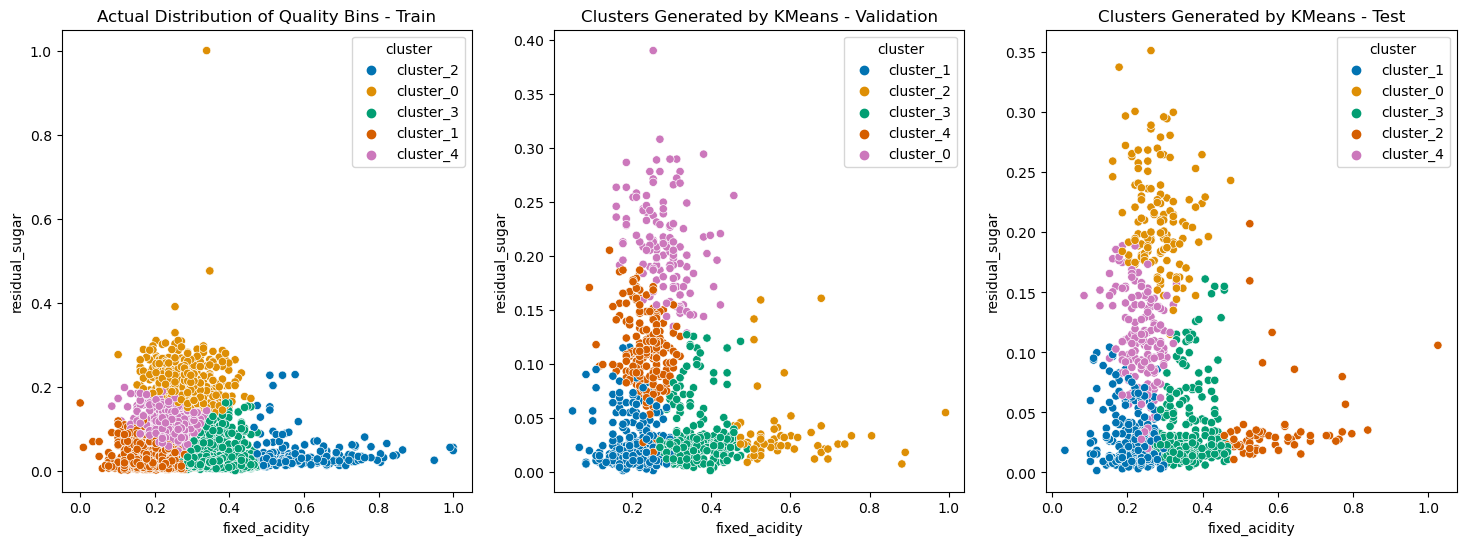

In [8]:
# Example usage:
train, val, test = find_and_plot_clusters(train_scaled, val_scaled, test_scaled, 'fixed_acidity', 'residual_sugar', 'density', n_clusters=5)


In [9]:
train_scaled.columns[39:]

Index(['composite_cluster_1', 'composite_cluster_2', 'composite_cluster_3',
       'composite_cluster_4'],
      dtype='object')

In [12]:
val_scaled.columns[39:]

Index(['composite_cluster_1', 'composite_cluster_2', 'composite_cluster_3',
       'composite_cluster_4'],
      dtype='object')

In [11]:
test_scaled.columns[39:]

Index(['composite_cluster_1', 'composite_cluster_2', 'composite_cluster_3',
       'composite_cluster_4'],
      dtype='object')